#  Neural Networks #


In [10]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Neural networks (NN) are a set of machine learning techniques that are more generic than specific other machine algorithms (such as SVMs, k-means, etc). NNs can solve a wide class of problems using the same constructs, as opposed to non-NN algorithms which tend to use fairly different constructs compared to eachother.

In addition, while in non-NN ML algorithms we often have to understand the problem spaces fairly well to apply the algorithms, NNs are much more generic and can solve a wide variety of problems, without us fully understanding how they solve those problems.

Neural networks are also inspired by human nature:


![Neutral Network](human-neural-net.png)



Very good general overview: https://www.youtube.com/watch?v=aircAruvnKk

Neural network example, with input, output and hidden layers:

![Neutral Network](neural_net.png)

Individual **neurons** are just sum or **"transfer"** functions:

![Sum Function](sum-function.png)

In most cases they have activation functions that will output constant or variable values if the output of the neuron reaches a certain threshold:

![Activation Function](activation-function.png)

Note that $w_{ij}$ represents the weights for input $i$ in neuron $j$ which can be represented as a matrix.

## Activation functions
There are multiple types of activation functions. Some popular ones:
 - [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), ```σ(x)σ(x)```: squashes numbers into the range (0, 1)
 - [Softmax](https://en.wikipedia.org/wiki/Softmax_function): Generalization of the sigmoid function of k-dimensional vectors, returning a vector of dimension k with real values in range of (0,1) **that add up to 1** (=normalization, this is different from sigmoid, where this sum doesn't need to add up to 1). Can for example be used to represent the probability that a given input belongs to one of k output classes.
 - The [rectified linear unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), ```ReLU(x)=max(0,x)```. This is quickly becoming one of the more popular activation functions, especially in Deep Learning, as it turns out that it's performance is better than the sigmoid function (and the function is simpler).
 - The [hyperbolic tangent](https://en.wikipedia.org/wiki/Hyperbolic_function#Standard_analytic_expressions): ```tanh(x)```, which squashes numbers into the range (-1, 1)

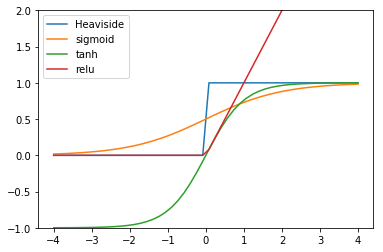

In [12]:
sess = tf.Session()
xx = np.linspace(-4, 4)
plt.plot(xx, xx > 0, label='Heaviside')
plt.plot(xx, sess.run(tf.nn.sigmoid(xx)), label='sigmoid')
plt.plot(xx, sess.run(tf.nn.tanh(xx)), label='tanh')
plt.plot(xx, sess.run(tf.nn.relu(xx)), label='relu')
plt.legend(loc=2)
plt.ylim(-1, 2);

## Real-world use of activation vectors

When using activation functions in the real world for **a classification task**, you usually use ReLU in hidden layers (because ReLU has the best performance trade-off), and softmax for the output layer. You use SoftMax at the output layer because you want to use the output numbers as membership probability for each of your target classes. Recall that SoftMax does squeezing of all dimensions between 0 and 1 and **ensures that the sum of all output vectors equals to 1**. This last part is important because this makes it impossible to have contradictory results (e.g. a classification outcome of 83% confidence an object is a banana and 74% confidence an object is a orange, the sum can't be more than 100%).


This is also what differentiates softmax from a regular sigmoid, which doesn't ensure the sum of the numbers to equal to 1 (it also doesn't work in multiple dimensions). 

In keras, you'd do this like so:
```python
model = keras.models.Sequential()
model.add(keras.layers.core.Dense(64, activation='relu'))
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dense(2,  activation='softmax'))
```

## Neural Network Types
There are different neural network types:

![Neural Network Types](neural-network-types.jpg)
    
    
**Perceptron**: no hidden layers, only input and output.

**Feed Forward**: No cycles or loops in the network.

**Deep Neural Networks**: neural networks that contain more than one hidden layer. 

**Recurrent Neural Network (RNN)**: also propagate data from later processing stages to earlier stages.

**Markov Chain**: You can go from any state to any other state. Probability to go from one state to another represented by a matrix.
    

# Recurrent Neural Networks

A RNN maintains internal memories about the world (weights assigned to different pieces of information) to help perform its classifications. For example, when classifying activities in movie clips, it will "remember" what has happened in previous clips.

![Recurrent Neural Network](rnn.png)


In this image, $\phi$ is the activation function, $W$ is the weights matrix associated with the current state, $U$ is the weights matrix associated with the previous state.

This can then in programming terms be interpreted as running a fixed program with certain inputs and some internal variables. 

A very simple implemtentation of an RNN might look like this (from http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

In [1]:
class RNN:
  # ...
  def step(self, x):
    # update the hidden state
    self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    # compute the output vector
    y = np.dot(self.W_hy, self.h)
    return y

Note how this compares to the picture above. In particular, note the following similarilites:
- the ```np.tanh``` activation function, which squashes the output between -1 and 1
- $h_t$ from the previous is called ```self.h```
- The terms in the sum inbetween ```np.tanh(...)``` are switched here, it's basically: ```np.tanh(prev state + current state)```, while the image above does $\phi (current + prev)$
- $W$ is called ```self.W_xh```, $U$ is called ```self.W_hh```
- in math terms, the code really does: $h_t = \tanh ( W_{hh} h_{t-1} + W_{xh} x_t ))$

# Long short-term memory Networks (LTSM)

A lot of the info that follows is based off this blogpost: http://blog.echen.me/2017/05/30/exploring-lstms/

Whereas an RNN can overwrite its memory at each time step in a fairly uncontrolled fashion, an LSTM (specific type of RNN) transforms its memory in a very precise way: by using specific learning mechanisms for which pieces of information to remember, which to update, and which to pay attention to. This helps it keep track of information over longer periods of time.

In the code above, and LTSM would make the computation of ```self.h``` more complicated.

# Convolutional Neural Networks (CNN)

Mostly used for visual recognition tasks (e.g. feature detection in images). Inspired by the human vision-related neural system. In CNNs, not every neuron in a layer is connected to every other neuron in the next layer. Instead neurons are only connected to *some* neurons in the next layer. In a sense, layers get aggregated into the next layer as shown in the next 2 images from [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do).

![CNN](cnn.png)

More detailed:

![CNN](cnn-detail.png)


Note that this is different to connecting every pixel/neutron to every other pixel/neutron in the next layer (this is how traditional RNNs work). This is also how the human vision neural system works: neurons only have a limited **receptive field** (i.e. The neurons that can trigger a particular neuron are in the local neighborhood and limited to a small area). Neurons have a form of hierarchy in which some neurons that detect lower level structure (e.g.: lines) trigger neurons that recognize higher-level structure (e.g. shapes), and so on.


In a CNN, a neuron's weights can be represented as a small image the size of the receptive field. These sets of weights are also called **filters** or **convolution kernels**. 

## CNN Architectures

CNNs are complex neural networks with many layers (convolutional layers and pooling layers), which typically follow certain architecture patterns. The hard part about CNNs is coming up with these architectures and designs. Some of these architectures are well known because they've made headlines performing very well in certain competiitions (e.g. on the ImageNet dataset). Examples include AlexNet (2012), VGG, GoogLeNet, LeNet, ResNet (2015), SENet(2017) and others. 

![CNN Architecture](cnn-architecture.png)

**AlexNet**

The below diagram of AlexNet shows that subsequent convolutional layers specialize on detecting more higher level features.

![AlexNet](alexnet.png)


## Pooling
(Joris: Pooling layers seem to be specific to CNNs.)

Pooling layers group/pool inputs together into a smaller layer. This reduces the computational cost by reducing the number of parameters to learn, while often still providing good results. For example, often times, not all input numbers are needed to detect a feature.

For example, in max pooling, we just take the highest (=max) number of each window we're considering. In the example below, the filter size = 2 (because the window=2x2), and the stride = 2, because we jump to steps to the right/bottom after applying the filter (i.e. there is no overlap between consecutive filter applications, which would be the case if stride was e.g. equal to 1).

![Max Pooling](max-pooling.webp)

Source: Book: Hands-on learning with Scikit-learn and tensorflow
![Max Pooling 2](max-pooling2.png)


Average Pooling is sometimes also used (averaging the numbers in the window), but this isn't often used.


# Auto-encoders

Type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction.

Source: "Deep Learning using Tensorflow" course at O'Reilly AIConf 2018.

![Auto-encoder](auto-encoder.png)


The "compressed" representation in the middle is often referred to as the *latent* representation.
Latent means not directly observable and refers to the reduction of a large number of directly observable features into a smaller set of indirectly observable features.